In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
%matplotlib inline

# Load the dataset

# Display the first few rows and summary statistics

In [2]:
df=pd.read_excel("sample-superstore-subset-excel.xlsx")

In [70]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Product Base Margin,Region,State or Province,City,Postal Code,Ship Date,Profit,Quantity ordered new,Sales,Order ID
Order Date,,,,,,,,,,,,,,,,,,,,,
2012-05-28,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,0.36,Central,Illinois,Addison,60101,2012-05-30,1.3200,2,5.90,88525
2010-07-07,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,0.54,West,Washington,Anacortes,98221,2010-07-08,4.5600,4,13.01,88522
2011-07-27,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,0.37,West,Washington,Anacortes,98221,2011-07-28,-47.6400,7,49.92,88523
2011-07-27,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,0.56,West,Washington,Anacortes,98221,2011-07-28,-30.5100,7,41.64,88523
2011-07-27,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,0.59,West,Washington,Anacortes,98221,2011-07-27,998.2023,8,1446.67,88523


In [4]:
df.shape

(9426, 24)

In [5]:
df.sample(10)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
8783,22086,Critical,0.06,1.68,1.00,3177,Laurie Petty,Regular Air,Consumer,Office Supplies,...,South,Florida,Jupiter,33458,2010-03-31,2010-04-02,-1319.50000,5,8.65,90819
8312,23519,High,0.02,65.99,3.99,3017,Melvin Benton,Regular Air,Corporate,Technology,...,West,California,Encinitas,92024,2013-06-24,2013-06-26,682.72050,18,989.45,89075
892,23478,Low,0.02,65.99,4.99,341,Donna Ross,Regular Air,Corporate,Technology,...,East,Connecticut,Seymour,6478,2013-10-28,2013-11-04,310.18500,14,815.75,88155
1073,21570,High,0.03,4.98,0.80,406,June Frank Hammond,Regular Air,Small Business,Office Supplies,...,East,New Jersey,South Vineland,8360,2010-05-21,2010-05-22,50.20440,15,72.76,87804
3468,4866,Low,0.04,30.98,19.51,1313,Katherine Knight,Express Air,Corporate,Office Supplies,...,East,Pennsylvania,Philadelphia,19134,2011-05-05,2011-05-14,-75.70000,67,2034.40,34657
7040,3794,High,0.06,599.99,24.49,2571,Rosemary O'Brien,Regular Air,Consumer,Technology,...,East,New York,New York City,10165,2011-11-22,2011-11-23,3128.69000,85,48418.58,27047
4328,18068,Not Specified,0.06,11.70,6.96,1628,Christy Watkins,Regular Air,Home Office,Office Supplies,...,Central,Oklahoma,Bartlesville,74006,2013-12-15,2013-12-18,-31.82928,23,258.97,86219
8551,18930,Low,0.06,2.89,0.50,3098,Lorraine Boykin,Regular Air,Consumer,Office Supplies,...,East,New York,Shirley,11967,2010-08-29,2010-08-29,9.61170,5,13.93,89316
1204,1906,High,0.04,5.58,5.30,471,Ross Simpson,Regular Air,Consumer,Office Supplies,...,South,Georgia,Atlanta,30318,2012-04-18,2012-04-19,-73.96130,30,168.20,13634
2396,21876,Medium,0.04,6.08,1.17,914,Marianne Cochran,Regular Air,Home Office,Office Supplies,...,Central,Texas,Brownsville,78521,2011-11-24,2011-11-26,74.53600,26,158.84,86358


In [6]:
df.describe(include='all')

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426,9426.000000,9426.000000,9426.000000,9426.000000,9426,9426,9426,9426,...,9426,9426,9426,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000,9426.000000
unique,NaN,6,NaN,NaN,NaN,NaN,2703,3,4,3,...,4,49,1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,High,NaN,NaN,NaN,NaN,Louis Parrish,Regular Air,Corporate,Office Supplies,...,Central,California,New York City,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1970,NaN,NaN,NaN,NaN,27,7036,3375,5181,...,2899,1021,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20241.015277,NaN,0.049628,88.303686,12.795142,1738.422236,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073
min,2.000000,NaN,0.000000,0.990000,0.490000,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,NaN,0.020000,6.480000,3.192500,898.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,NaN,0.050000,20.990000,6.050000,1750.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,NaN,0.080000,85.990000,13.990000,2578.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,NaN,0.250000,6783.020000,164.730000,3403.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000


In [7]:
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [8]:

# Handle missing values
df.isnull().sum()
# Convert data types if necessary  /// Thre are no need for converting data types becouse no any null falues and 


# Create any new columns needed for analysis



Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [72]:

df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)


C:\Users\i ball\AppData\Local\Temp\ipykernel_5236\1947927410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)


In [73]:

df.dropna(subset=['Product Base Margin'], inplace=True)


In [76]:

threshold = 1000 
df['High Sales'] = df['Sales'] > threshold


In [77]:

df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100


In [78]:

df.head()


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Ship Date,Profit,Quantity ordered new,Sales,Order ID,High Sales,Profit Margin
Order Date,,,,,,,,,,,,,,,,,,,,,
2012-05-28,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-30,1.3200,2,5.90,88525,False,22.372881
2010-07-07,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-08,4.5600,4,13.01,88522,False,35.049962
2011-07-27,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-28,-47.6400,7,49.92,88523,False,-95.432692
2011-07-27,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-28,-30.5100,7,41.64,88523,False,-73.270893
2011-07-27,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,998.2023,8,1446.67,88523,True,69.000000


In [13]:
duplicate = df.duplicated()
duplicate.sum()

0

In [14]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [79]:
# Univariate analysis
df.describe()

# Bivariate analysis

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Profit Margin
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512249,52446.327286,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073,-19.128665
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000,-51413.739488
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000,-56.376675
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000,1.283953
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000,51.434911
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000,99998.303030
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.134713,29374.597802,NaN,998.486483,15.107688,2598.019818,19149.448857,1678.700161


In [80]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

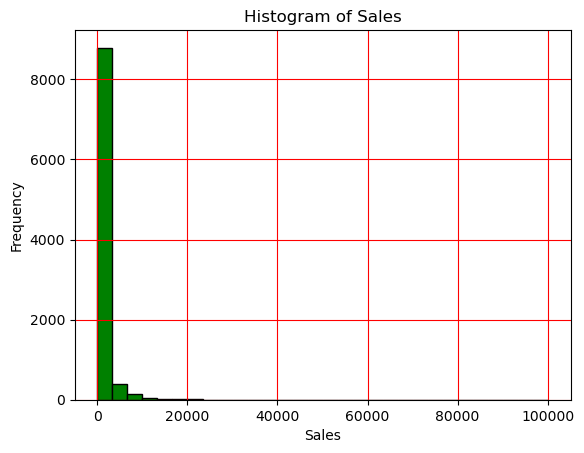

In [83]:
plt.hist(df['Sales'], bins=30, edgecolor='black' ,color='green')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True,color='red')

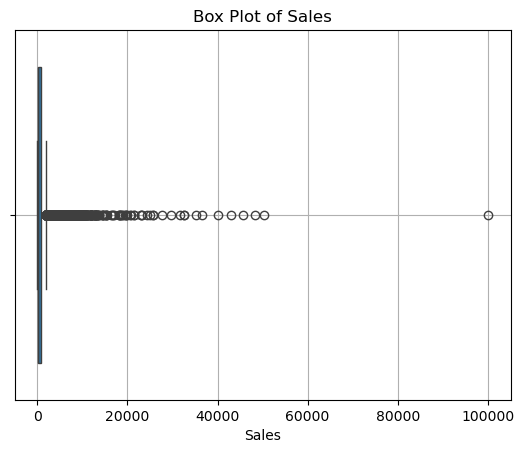

In [85]:
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.grid(True)

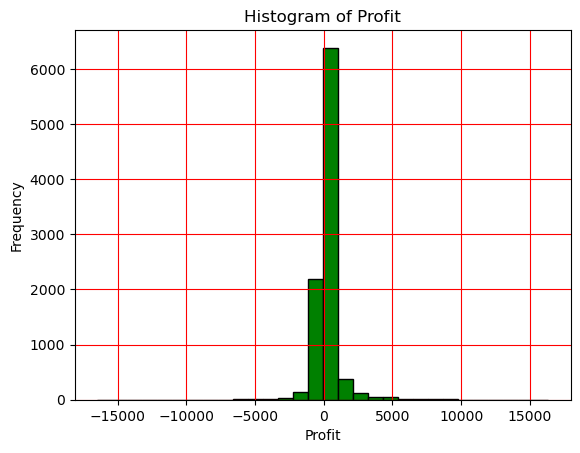

In [100]:
plt.hist(df['Profit'], bins=30, edgecolor='black',color='green')
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(True,color='red')


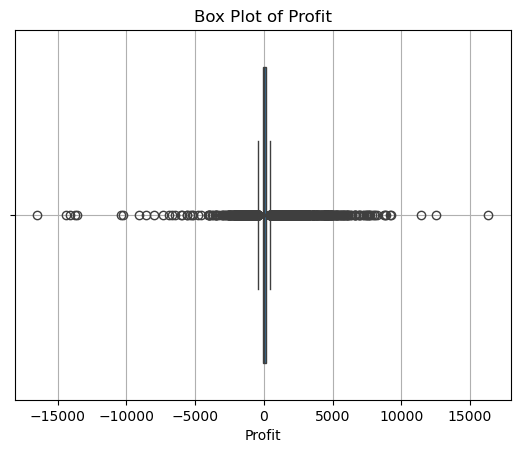

In [87]:
sns.boxplot(x=df['Profit'])
plt.title('Box Plot of Profit')
plt.xlabel('Profit')
plt.grid(True)

In [91]:

# Summary statistics for key variables
key_variables = ['Sales', 'Profit', 'Discount', 'Quantity ordered new']
df[key_variables].describe()

# Grouped statistics





,Sales,Profit,Discount,Quantity ordered new
count,9426.000000,9426.000000,9426.000000,9426.000000
mean,949.706272,139.236410,0.049628,13.798430
std,2598.019818,998.486483,0.031798,15.107688
min,1.320000,-16476.838000,0.000000,1.000000
25%,61.282500,-74.017375,0.020000,5.000000
50%,203.455000,2.567600,0.050000,10.000000
75%,776.402500,140.243850,0.080000,17.000000
max,100119.160000,16332.414000,0.250000,170.000000


In [92]:
df.groupby('Product Category').agg({
    'Sales': ['mean', 'sum', 'count'],
    'Profit': ['mean', 'sum', 'count'],
    'Discount': ['mean', 'sum'],
    'Quantity ordered new': ['mean', 'sum']
})


Sales                        Profit                 \
                         mean         sum count        mean            sum   
Product Category                                                             
Furniture         1644.399245  3178623.74  1933   91.750801  177354.298188   
Office Supplies    435.886036  2258325.55  5181   87.239957  451990.216492   
Technology        1520.320947  3514982.03  2312  295.457563  683097.884748   

                        Discount         Quantity ordered new         
                 count      mean     sum                 mean    sum  
Product Category                                                      
Furniture         1933  0.049188   95.08            13.787894  26652  
Office Supplies   5181  0.050187  260.02            13.808531  71542  
Technology        2312  0.048741  112.69            13.784602  31870

In [93]:
df.groupby('Ship Mode').agg({
    'Sales': ['mean', 'sum', 'count'],
    'Profit': ['mean', 'sum', 'count'],
    'Discount': ['mean', 'sum'],
    'Quantity ordered new': ['mean', 'sum']
})


Sales                        Profit                 \
                       mean         sum count        mean            sum   
Ship Mode                                                                  
Delivery Truck  2888.944677  3706516.02  1283  208.933678  268061.908387   
Express Air      633.926233   701756.34  1107  136.204485  150778.364674   
Regular Air      645.773019  4543658.96  7036  127.004282  893602.126367   

                      Discount         Quantity ordered new         
               count      mean     sum                 mean    sum  
Ship Mode                                                           
Delivery Truck  1283  0.049774   63.86            13.095869  16802  
Express Air     1107  0.049991   55.34            13.600723  15056  
Regular Air     7036  0.049544  348.59            13.957646  98206


### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [112]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions

North_Region= df[df['Region'] == 'North']['Sales']
South_Region= df[df['Region'] == 'South']['Sales']


# Example: Chi-square test for independence between Ship Mode and Customer Segment


t_stat, p_value = stats.ttest_ind(North_Region,South_Region, equal_var=False)
f"T-statatic:{t_stat}
f"P-value:{p_value}

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between North and South regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between North and South regions.")

SyntaxError: unterminated f-string literal (detected at line 13) (2110196153.py, line 13)

In [98]:
# Selecting only numeric columns for correlation matrix


In [38]:
matrix=numeric_df.corr()
matrix

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
Row ID,1.000000,0.000912,0.007586,0.004780,0.038840,-0.002041,0.033833,-0.006431,-0.574926,-0.220454,0.918587
Discount,0.000912,1.000000,0.001099,-0.002141,-0.005723,0.006910,-0.001707,-0.039467,-0.014062,-0.021286,-0.000055
Unit Price,0.007586,0.001099,1.000000,0.246251,-0.007310,0.061985,0.023104,-0.048559,-0.054415,0.433984,0.009805
Shipping Cost,0.004780,-0.002141,0.246251,1.000000,-0.014462,0.375115,-0.003406,-0.017034,-0.020198,0.310223,0.007070
Customer ID,0.038840,-0.005723,-0.007310,-0.014462,1.000000,-0.020385,-0.086988,0.007962,-0.028248,-0.004937,0.043739
Product Base Margin,-0.002041,0.006910,0.061985,0.375115,-0.020385,1.000000,-0.004403,-0.069927,0.000234,0.117595,0.006753
Postal Code,0.033833,-0.001707,0.023104,-0.003406,-0.086988,-0.004403,1.000000,0.005364,-0.010895,-0.000176,0.037847
Profit,-0.006431,-0.039467,-0.048559,-0.017034,0.007962,-0.069927,0.005364,1.000000,0.124924,0.371583,-0.003428
Quantity ordered new,-0.574926,-0.014062,-0.054415,-0.020198,-0.028248,0.000234,-0.010895,0.124924,1.000000,0.360121,-0.599471
Sales,-0.220454,-0.021286,0.433984,0.310223,-0.004937,0.117595,-0.000176,0.371583,0.360121,1.000000,-0.228260


<Axes: >

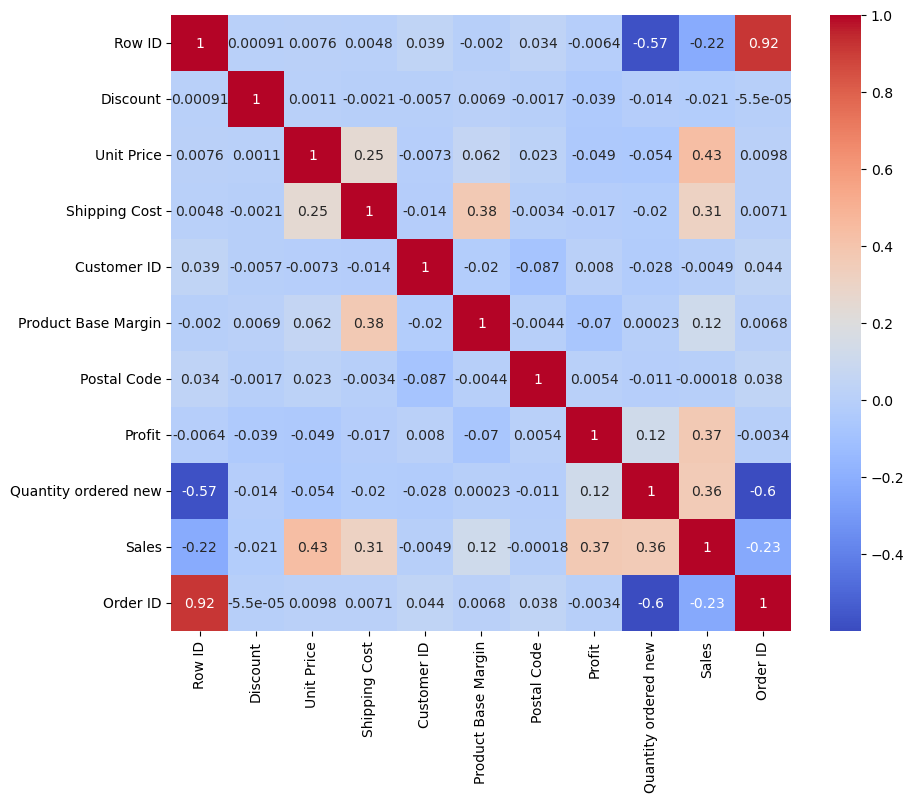

In [41]:

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')


In [111]:
# Plotting profit trends over time



C:\Users\i ball\AppData\Local\Temp\ipykernel_5236\4112220982.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sales', x='Product Category', data=top_sales_categories, palette='viridis')


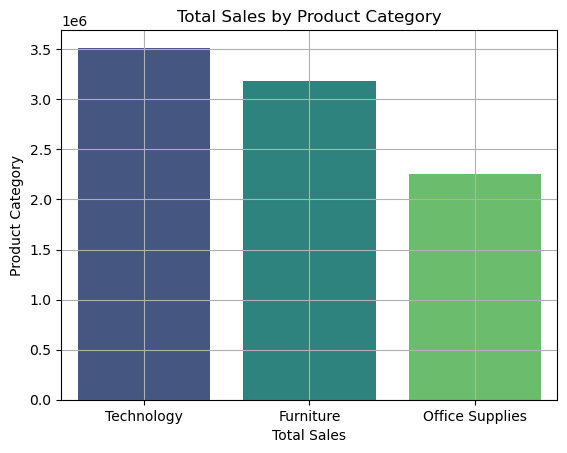

In [116]:

# Identifying top-performing product categories based on total sales and profit
category_performance = df.groupby('Product Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()



# Plotting total sales by product category

top_sales_categories = category_performance.sort_values(by='Sales', ascending=False)
top_sales_categories

sns.barplot(y='Sales', x='Product Category', data=top_sales_categories, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.grid(True)





# Plotting total profit by product category









C:\Users\i ball\AppData\Local\Temp\ipykernel_5236\2118508750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Profit', x='Product Category', data=top_sales_categories, palette='viridis')


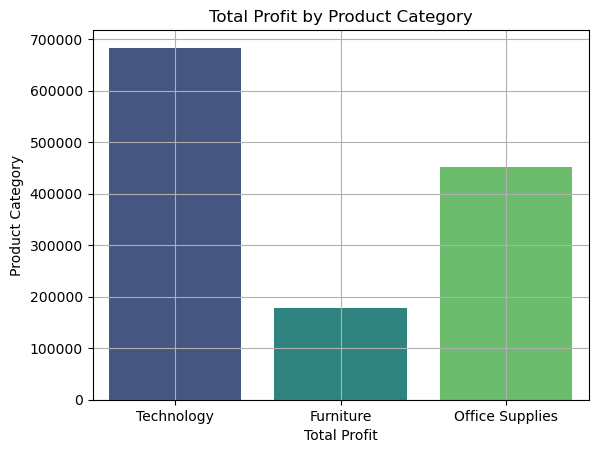

In [117]:
top_Profit_categories = category_performance.sort_values(by='Profit', ascending=False)
top_Profit_categories

sns.barplot(y='Profit', x='Product Category', data=top_sales_categories, palette='viridis')
plt.title('Total Profit by Product Category')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.grid(True)

In [118]:

# Generating summary statistics for each region
summary_statistics_by_region = df.groupby('Region').agg({
    'Sales': ['mean', 'median', 'std', 'min', 'max'],
    'Profit': ['mean', 'median', 'std', 'min', 'max'],
    'Discount': ['mean', 'median', 'std', 'min', 'max'],
    'Quantity ordered new': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

summary_statistics_by_region.columns = [' '.join(col).strip() for col in summary_statistics_by_region.columns.values]
summary_statistics_by_region
# Display summary statistics




,Region,Sales mean,Sales median,Sales std,Sales min,Sales max,Profit mean,Profit median,Profit std,Profit min,...,Discount mean,Discount median,Discount std,Discount min,Discount max,Quantity ordered new mean,Quantity ordered new median,Quantity ordered new std,Quantity ordered new min,Quantity ordered new max
0,Central,876.282035,203.370,2041.342685,2.24,32589.59,179.312027,6.1400,933.585650,-13706.4640,...,0.049348,0.05,0.031932,0.0,0.25,13.136599,10.0,14.328396,1,148
1,East,1058.455518,225.140,2802.669839,1.32,48418.58,164.948094,2.0672,885.393514,-4017.6165,...,0.050000,0.05,0.031824,0.0,0.10,15.217562,11.0,16.905533,1,167
2,South,817.475036,180.375,2173.877698,2.66,40136.93,53.327120,-3.1171,1059.835314,-16476.8380,...,0.049401,0.05,0.031678,0.0,0.10,11.980041,10.0,11.081789,1,97
3,West,1047.039755,204.730,3258.451329,1.62,100119.16,136.098710,2.7080,1119.788147,-14140.7016,...,0.049803,0.05,0.031722,0.0,0.10,14.771891,10.0,16.847024,1,170


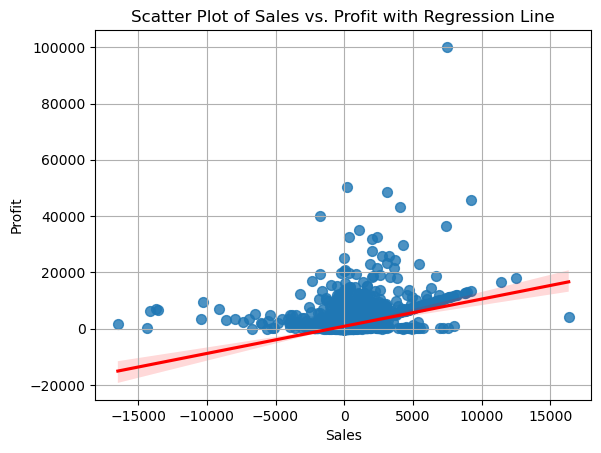

In [120]:

# Visualizing the correlation between sales and profit

correlation_coefficient = df[['Sales', 'Profit']].corr().loc['Sales', 'Profit']


# Displaying the correlation coefficient

sns.regplot(y='Sales',x='Profit', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot of Sales vs. Profit with Regression Line')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)




In [63]:

# Analyzing seasonal sales trends




# Grouping sales data by month and year



# Plotting seasonal sales trends









In [64]:

# Comparing sales across different ship modes






In [ ]:
# Ensure column names are clean


# Print column names to verify


# Ensure 'Ship Date' column is datetime type


# Dropping rows where 'Ship Date' couldn't be converted


# Resample sales data by month









